<a href="https://colab.research.google.com/github/Asmita-110120/Sales-Analysis/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install squarify

In [3]:
import numpy as np 
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import io

In [61]:
plt.rcParams.update({'font.size': 12})

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Sample - Superstore.csv to Sample - Superstore.csv


In [6]:
df = pd.read_csv(io.StringIO(uploaded['Sample - Superstore.csv'].decode('windows-1252')))
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


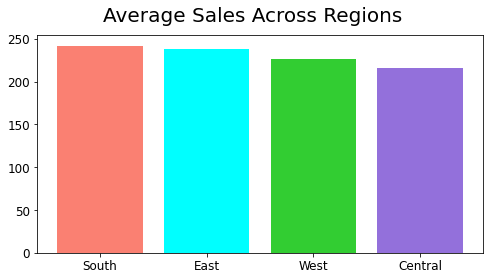

In [71]:
df_1 = df[['Region','Sales']]
df_1 = df_1.groupby('Region').mean().sort_values(by='Sales', ascending=False)
plt.figure(figsize=[8,4])


plt.suptitle("Average Sales Across Regions", size=20)



plt.bar(x=df_1.index, height='Sales',color=['salmon','cyan','limegreen','mediumpurple'], data=df_1)



plt.show()


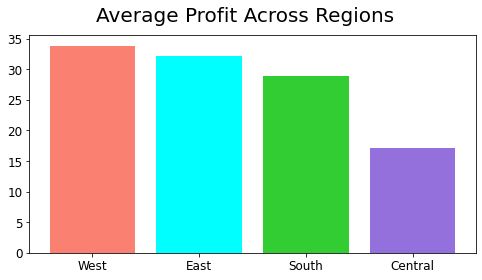

In [66]:
df_Profit_Region = df[['Region','Profit']]
df_Profit_Region = df_Profit_Region.groupby('Region').mean().sort_values(by='Profit', ascending=False)
plt.figure(figsize=[8,4])

plt.suptitle("Average Profit Across Regions", size=20)



plt.bar(x=df_Profit_Region.index, height='Profit',color=['salmon','cyan','limegreen','mediumpurple'], data=df_Profit_Region)



plt.show()

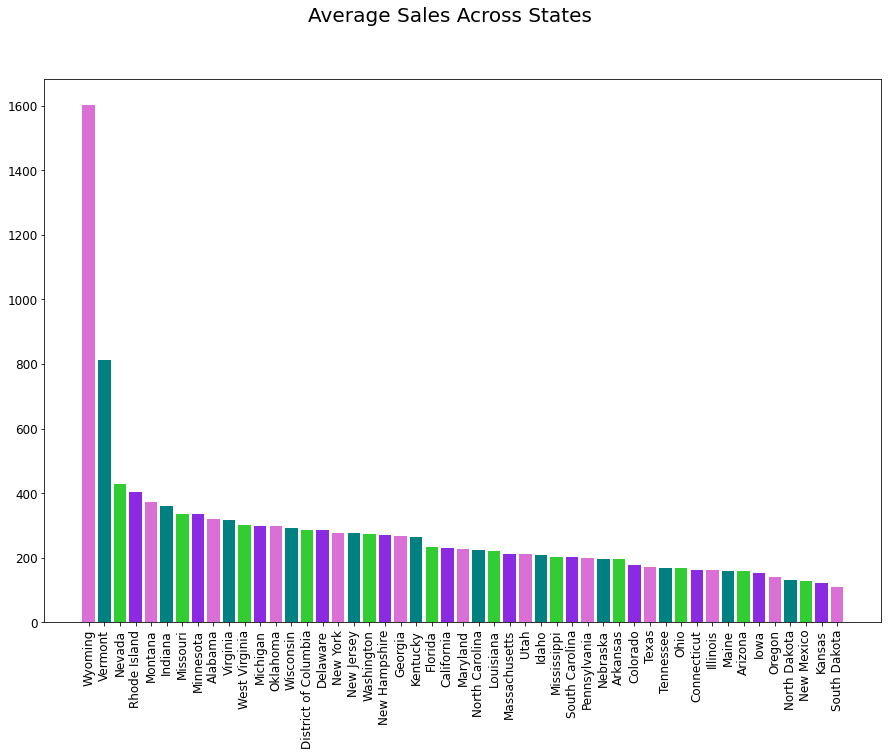

In [64]:
df_Sales_state = df[['State','Sales']]
df_Sales_state = df_Sales_state.groupby('State').mean().sort_values(by='Sales', ascending=False)
plt.figure(figsize=[15,10])

plt.suptitle("Average Sales Across States", size=20)



plt.bar(x=df_Sales_state.index, height='Sales',color=['orchid','teal','limegreen','blueviolet'], data=df_Sales_state)
plt.xticks(rotation='vertical')


plt.show()

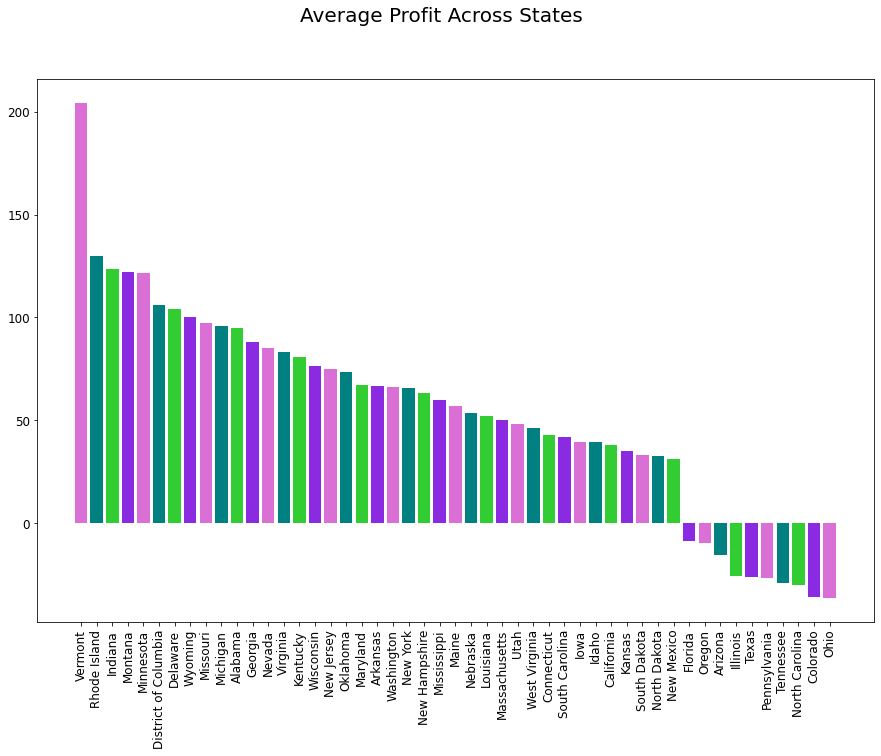

In [65]:
df_Profit_state = df[['State','Profit']]
df_Profit_state = df_Profit_state.groupby('State').mean().sort_values(by='Profit', ascending=False)
plt.figure(figsize=[15,10])

plt.suptitle("Average Profit Across States", size=20)



plt.bar(x=df_Profit_state.index, height='Profit',color=['orchid','teal','limegreen','blueviolet'], data=df_Profit_state)
plt.xticks(rotation='vertical')


plt.show()

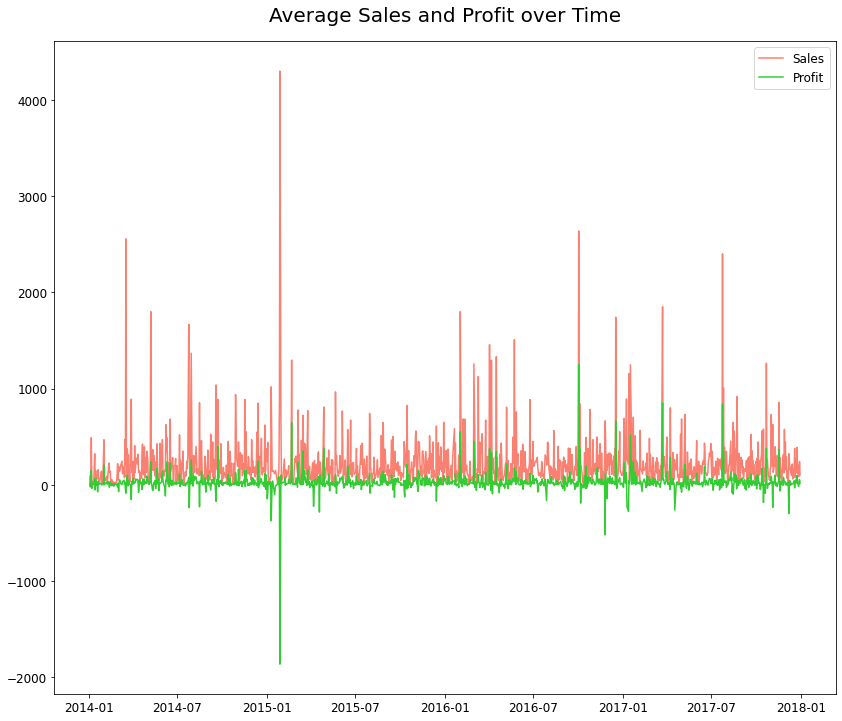

In [72]:
df_2 = df[['Order Date','Sales','Profit']].sort_values('Order Date')
df_2['Order Date'] = pd.to_datetime(df_2['Order Date']) 
df_2 = df_2.groupby('Order Date').mean() 


plt.figure(figsize=[14,12])
plt.plot(df_2.index, 'Sales', data=df_2, color='salmon', label='Sales') 
plt.plot(df_2.index, 'Profit', data=df_2, color='limegreen',label='Profit' ) 
plt.title("Average Sales and Profit over Time", size=20, pad=20)
plt.legend()

plt.show()

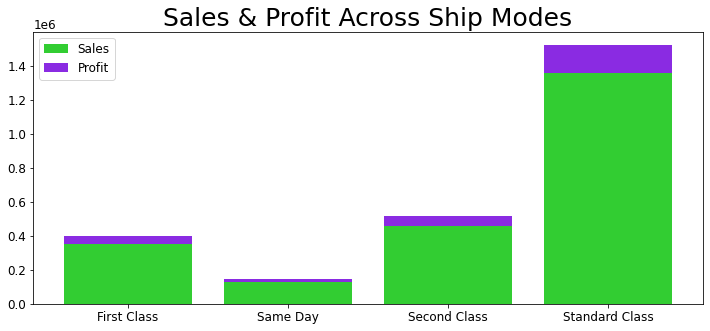

In [75]:

df_4 = df[['Ship Mode','Sales','Profit']]
df_4 = df_4.groupby(['Ship Mode']).sum().reset_index()

plt.figure(figsize=[12,5])

plt.bar(x=df_4['Ship Mode'], height=df_4['Sales'], color='limegreen')
plt.bar(x=df_4['Ship Mode'], height=df_4['Profit'], bottom=df_4['Sales'], color='blueviolet')
plt.title("Sales & Profit Across Ship Modes", size=25)
plt.legend(['Sales','Profit'])

plt.show()

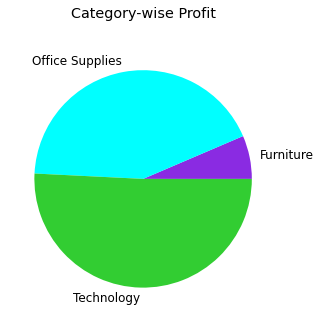

In [69]:
df_5 = df[['Category','Sales','Profit']]
df_5 = df_5.groupby(['Category']).sum().reset_index()

plt.figure(figsize=[10,5])

plt.pie(df_5['Profit'], labels=df_5['Category'], colors=['blueviolet','cyan','limegreen'])
plt.title("Category-wise Profit",pad=25)
plt.show()



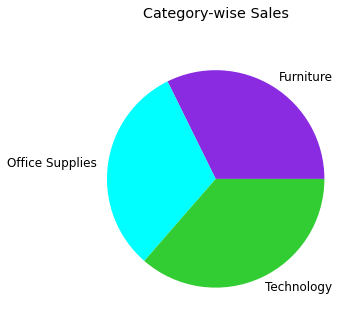

In [70]:
plt.figure(figsize=[10,5])

plt.pie(df_5['Sales'], labels=df_5['Category'], colors=['blueviolet','cyan','limegreen'])
plt.title("Category-wise Sales",pad=25)

plt.show()

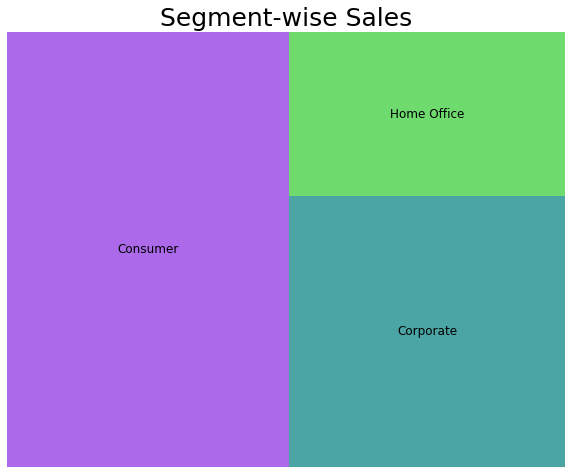

In [76]:
df_6 = df[['Segment','Sales']]
df_6 = df_6.groupby(['Segment']).sum().reset_index()


plt.figure(figsize=[10,8])

squarify.plot(sizes=df_6['Sales'], label=df_6['Segment'],
              color=['blueviolet','teal','limegreen'], alpha=0.7)
plt.title("Segment-wise Sales", size=25)
plt.axis('off')

plt.show()